# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataset

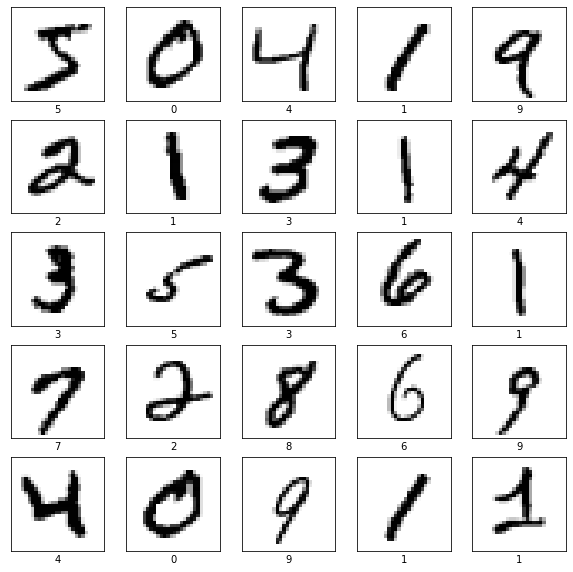


Train Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [ ]:
#load
mnist = tf.keras.datasets.mnist
(train, train_labels), (test, test_labels) = mnist.load_data()

class_names = np.asarray(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

#sample
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

print('\nTrain Shape: {}'.format(train.shape))
print('Train Labels Shape: {}'.format(train_labels.shape))
print('Test Shape: {}'.format(test.shape))
print('Test Labels Shape: {}'.format(test_labels.shape))

# Preprocess Data

In [ ]:
#reshape
train, test = np.expand_dims(train, axis=3), np.expand_dims(test, axis=3)

#onehot
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

print('\nTrain Shape: {}'.format(train.shape))
print('Train Labels Shape: {}'.format(train_labels.shape))
print('Test Shape: {}'.format(test.shape))
print('Test Labels Shape: {}'.format(test_labels.shape))


Train Shape: (60000, 28, 28, 1)
Train Labels Shape: (60000, 10)
Test Shape: (10000, 28, 28, 1)
Test Labels Shape: (10000, 10)


# CNN

In [ ]:
x = Input(shape=(28, 28, 1), name='Input')

out = Conv2D(6, 5, padding='same', activation='relu', name='C1')(x)
out = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Avg1')(out)
out = Conv2D(16, 5, padding='same', activation='relu', name='C2')(out)
out = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Avg2')(out)
out = Conv2D(120, 5, padding='same', activation='relu', name='C3')(out)
out = Flatten(name='Flatten')(out)
out = Dense(84, activation='relu', name='D1')(out)
out = Dense(10, activation='softmax', name='Ouput')(out)

CNN = Model(x, out)
CNN.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
C1 (Conv2D)                  (None, 28, 28, 6)         156       
_________________________________________________________________
Avg1 (MaxPooling2D)          (None, 14, 14, 6)         0         
_________________________________________________________________
C2 (Conv2D)                  (None, 14, 14, 16)        2416      
_________________________________________________________________
Avg2 (MaxPooling2D)          (None, 7, 7, 16)          0         
_________________________________________________________________
C3 (Conv2D)                  (None, 7, 7, 120)         48120     
_________________________________________________________________
Flatten (Flatten)            (None, 5880)             

In [ ]:
optimizer = Adam(learning_rate=1e-2)
CNN.compile(optimizer, 'categorical_crossentropy', ['accuracy'])
history = CNN.fit(train, train_labels, validation_data=(test, test_labels), epochs=10, batch_size=512, shuffle=True)

Epoch 1/10
118/118 [==============================] - 1s 9ms/step - loss: 6.5253 - accuracy: 0.4320 - val_loss: 0.6016 - val_accuracy: 0.7984
Epoch 2/10
118/118 [==============================] - 1s 8ms/step - loss: 0.4717 - accuracy: 0.8444 - val_loss: 0.3890 - val_accuracy: 0.8756
Epoch 3/10
118/118 [==============================] - 1s 8ms/step - loss: 0.3187 - accuracy: 0.8981 - val_loss: 0.2828 - val_accuracy: 0.9138
Epoch 4/10
118/118 [==============================] - 1s 8ms/step - loss: 0.2295 - accuracy: 0.9270 - val_loss: 0.2229 - val_accuracy: 0.9323
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1821 - accuracy: 0.9426 - val_loss: 0.1794 - val_accuracy: 0.9458
Epoch 6/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1459 - accuracy: 0.9547 - val_loss: 0.1448 - val_accuracy: 0.9552
Epoch 7/10
118/118 [==============================] - 1s 8ms/step - loss: 0.1283 - accuracy: 0.9591 - val_loss: 0.1314 - val_accuracy: 0.9590
Epoch 

In [ ]:
pred = CNN.predict(test)
pred_labels = np.argmax(pred, axis=1)
print('Accuracy: {:.2f}%'.format(np.sum(pred_labels == np.argmax(test_labels, axis=1)) / pred_labels.shape[0] * 100))

Accuracy: 96.78%


In [ ]:
rand_index = np.random.randint(10000)

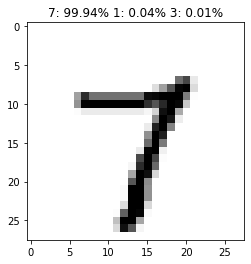

In [ ]:
plt.imshow(test[rand_index].reshape(28,28), cmap=plt.cm.binary)
idx = pred[rand_index].argsort()[-3:][::-1]
acc = np.sort(pred[rand_index])[-3:][::-1] * 100.0
plt.title('{0}: {3:.2f}% {1}: {4:.2f}% {2}: {5:.2f}%'.format(*class_names[idx], *acc))
plt.show()

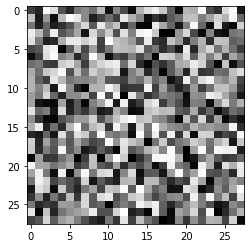

In [ ]:
def gen_fake_data(num_images):
  image = np.random.randint(low=0, high=256,  size=(num_images, 28, 28, 1))
  return image

fake = gen_fake_data(1)
plt.imshow(fake.reshape(28,28), cmap=plt.cm.binary)
plt.show()

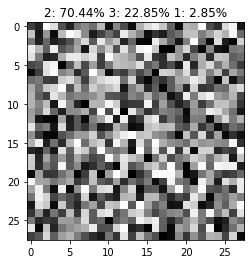

In [ ]:
fake_pred = CNN.predict(fake)

plt.imshow(fake.reshape(28,28), cmap=plt.cm.binary)
idx = fake_pred[0].argsort()[-3:][::-1]
acc = np.sort(fake_pred[0])[-3:][::-1] * 100.0
plt.title('{0}: {3:.2f}% {1}: {4:.2f}% {2}: {5:.2f}%'.format(*class_names[idx], *acc))
plt.show()

# BCNN

Just need to make a few replacements.
* [2D Convolution with Flipout](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/Convolution2DFlipout)
* [Dense with Flipout](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseFlipout)


In [ ]:
kl_divergence_function = (lambda q, p, _: tfp.distributions.kl_divergence(q, p) / tf.cast(train.shape[0], dtype=tf.float32))

x = Input(shape=(28, 28, 1), name='Input')

#out = Conv2D(6, 5, padding='same', activation='relu', name='C1')(x)
out = tfp.layers.Convolution2DFlipout(6, 5, padding='same', activation='relu', name='CF1', kernel_divergence_fn=kl_divergence_function)(x)
out = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Avg1')(out)
#out = Conv2D(16, 5, padding='same', activation='relu', name='C2')(out)
out = tfp.layers.Convolution2DFlipout(16, 5, padding='same', activation='relu', name='CF2', kernel_divergence_fn=kl_divergence_function)(out)
out = MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same', name='Avg2')(out)
#out = Conv2D(120, 5, padding='same', activation='relu', name='C3')(out)
out = tfp.layers.Convolution2DFlipout(120, 5, padding='same', activation='relu', name='CF3', kernel_divergence_fn=kl_divergence_function)(out)
out = Flatten(name='Flatten')(out)
#out = Dense(84, activation='relu', name='D1')(out)
out = tfp.layers.DenseFlipout(84, activation='relu', kernel_divergence_fn=kl_divergence_function)(out)
#out = Dense(10, activation='softmax', name='Ouput')(out)
out = tfp.layers.DenseFlipout(10, activation='softmax', kernel_divergence_fn=kl_divergence_function)(out)

BCNN = Model(x, out)
BCNN.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 28, 28, 1)]       0         
_________________________________________________________________
CF1 (Conv2DFlipout)          (None, 28, 28, 6)         306       
_________________________________________________________________
Avg1 (MaxPooling2D)          (None, 14, 14, 6)         0         
_________________________________________________________________
CF2 (Conv2DFlipout)          (None, 14, 14, 16)        4816      
_________________________________________________________________
Avg2 (MaxPooling2D)          (None, 7, 7, 16)          0         
_________________________________________________________________
CF3 (Conv2DFlipout)          (None, 7, 7, 120)         96120     
_________________________________________________________________
Flatten (Flatten)            (None, 5880)             

In [ ]:
optimizer = Adam(learning_rate=1e-2)
BCNN.compile(optimizer, 'categorical_crossentropy', ['accuracy'])
history = BCNN.fit(train, train_labels, validation_data=(test, test_labels), epochs=10, batch_size=512, shuffle=True)

Epoch 1/10
118/118 [==============================] - 3s 24ms/step - loss: 45.2929 - accuracy: 0.1792 - val_loss: 23.6020 - val_accuracy: 0.2664
Epoch 2/10
118/118 [==============================] - 2s 16ms/step - loss: 22.3920 - accuracy: 0.4242 - val_loss: 20.9772 - val_accuracy: 0.6372
Epoch 3/10
118/118 [==============================] - 2s 17ms/step - loss: 19.7628 - accuracy: 0.7523 - val_loss: 18.6592 - val_accuracy: 0.8318
Epoch 4/10
118/118 [==============================] - 2s 17ms/step - loss: 17.8264 - accuracy: 0.8576 - val_loss: 17.0163 - val_accuracy: 0.8843
Epoch 5/10
118/118 [==============================] - 2s 17ms/step - loss: 16.3354 - accuracy: 0.8938 - val_loss: 15.6566 - val_accuracy: 0.9037
Epoch 6/10
118/118 [==============================] - 2s 16ms/step - loss: 15.0633 - accuracy: 0.9100 - val_loss: 14.4514 - val_accuracy: 0.9230
Epoch 7/10
118/118 [==============================] - 2s 17ms/step - loss: 13.9432 - accuracy: 0.9175 - val_loss: 13.3878 - val_ac

In [ ]:
pred = BCNN.predict(test)
pred_labels = np.argmax(pred, axis=1)
print('Accuracy: {:.2f}%'.format(np.sum(pred_labels == np.argmax(test_labels, axis=1)) / pred_labels.shape[0] * 100))

Accuracy: 93.59%


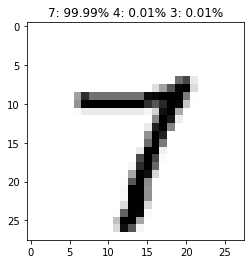

In [ ]:
plt.imshow(test[rand_index].reshape(28,28), cmap=plt.cm.binary)
idx = pred[rand_index].argsort()[-3:][::-1]
acc = np.sort(pred[rand_index])[-3:][::-1] * 100.0
plt.title('{0}: {3:.2f}% {1}: {4:.2f}% {2}: {5:.2f}%'.format(*class_names[idx], *acc))
plt.show()

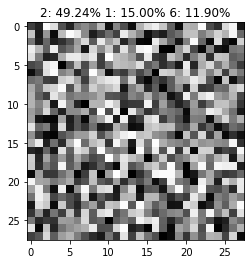

In [ ]:
fake_pred = BCNN.predict(fake)

plt.imshow(fake.reshape(28,28), cmap=plt.cm.binary)
idx = fake_pred[0].argsort()[-3:][::-1]
acc = np.sort(fake_pred[0])[-3:][::-1] * 100.0
plt.title('{0}: {3:.2f}% {1}: {4:.2f}% {2}: {5:.2f}%'.format(*class_names[idx], *acc))
plt.show()

In [ ]:
for i in range(100):
  print((np.argmax(BCNN.predict(fake)),np.max(BCNN.predict(fake))), end='')
  if i > 0 and (i+1) % 10 == 0:
    print('')

(3, 0.24398261)(7, 0.28782922)(2, 0.40193743)(1, 0.28230846)(7, 0.28315532)(6, 0.906095)(2, 0.5532211)(2, 0.5886606)(2, 0.525218)(2, 0.27971426)
(2, 0.7096069)(2, 0.44550174)(8, 0.31177202)(8, 0.28741914)(1, 0.32413757)(2, 0.24664631)(4, 0.46968132)(4, 0.48932883)(8, 0.49406847)(9, 0.27740267)
(2, 0.61393243)(5, 0.22645229)(1, 0.5845901)(2, 0.24349855)(6, 0.24053693)(4, 0.529558)(9, 0.26264605)(6, 0.36680132)(2, 0.32436967)(6, 0.24071398)
(6, 0.32802242)(2, 0.45861727)(8, 0.8710944)(2, 0.1947532)(9, 0.78746307)(4, 0.30745155)(8, 0.59930587)(6, 0.6731374)(2, 0.5499942)(6, 0.5232335)
(2, 0.23284094)(6, 0.6089465)(5, 0.2386361)(2, 0.792928)(6, 0.19897637)(3, 0.46193707)(6, 0.53110653)(2, 0.44254413)(6, 0.5103231)(2, 0.33804163)
(2, 0.24924602)(2, 0.355936)(4, 0.5669001)(2, 0.503241)(2, 0.37563747)(2, 0.290397)(4, 0.8017513)(2, 0.33063835)(1, 0.26847675)(6, 0.5758751)
(6, 0.17209546)(2, 0.54670084)(5, 0.26159728)(3, 0.2822307)(2, 0.2079724)(8, 0.31039134)(9, 0.2879308)(9, 0.15841419)(6, 0.

In [ ]:
def predict_monte_carlo(data, num_steps=50):
  #return prob and entropy calculated using monte carlo sampling

  def entropy(p):
      return -1 * np.sum(np.log(p+1e-15) * p, axis=0)

  pred = np.asarray([BCNN.predict(data) for _ in range(num_steps)])
  mean_pred = np.mean(pred, axis=0)
  entropy = np.apply_along_axis(entropy, axis=1, arr=mean_pred) 
  return mean_pred, entropy

In [ ]:
pred, entropy = predict_monte_carlo(fake)
print(np.argmax(pred), np.round(np.max(pred * 100), 2), entropy)

2 23.53 [2.12866139]


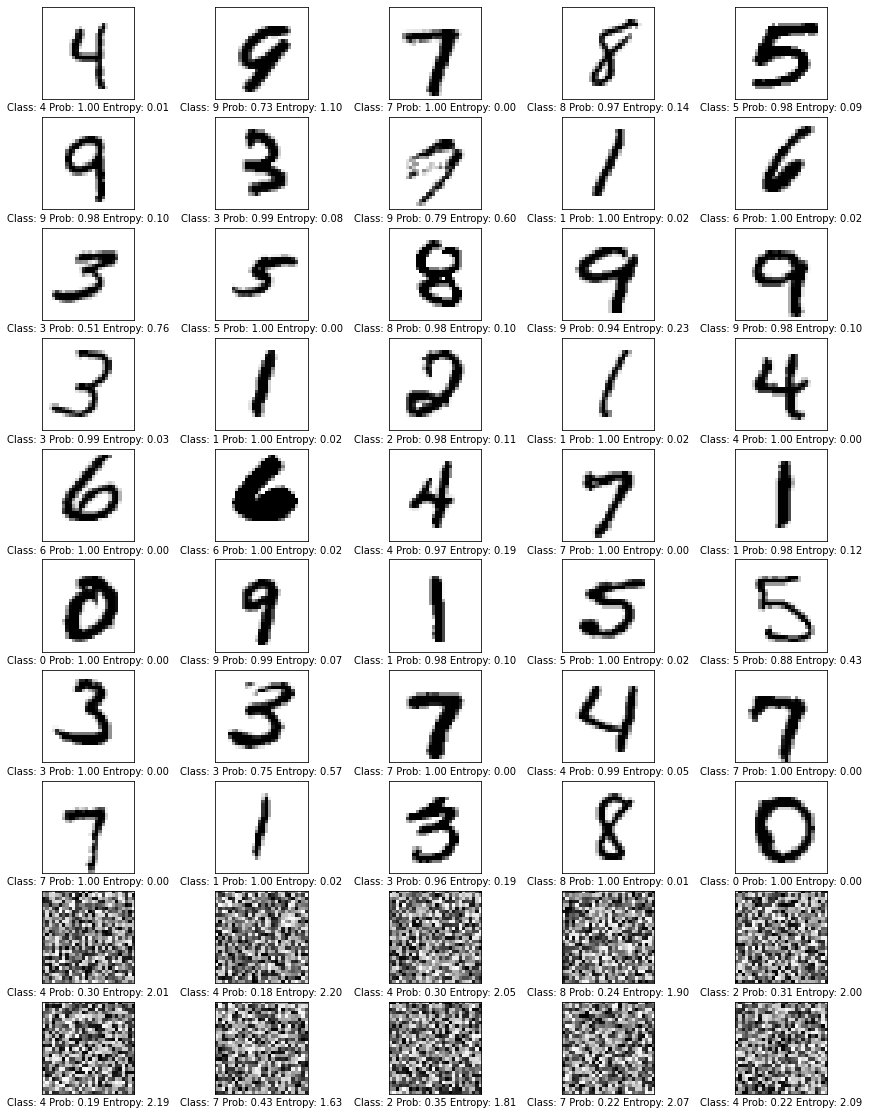

In [ ]:
idx = np.random.randint(10000, size=40, dtype=np.int)
samples = np.concatenate([test[idx, :, :], gen_fake_data(10)], axis=0)
pred, entropy = predict_monte_carlo(samples)

#sample
plt.figure(figsize=(15,20))
for i in range(50):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i, :, :].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel('Class: {} Prob: {:.2f} Entropy: {:.2f}'.format(class_names[np.argmax(pred[i])], np.max(pred[i]), entropy[i]))
plt.show()